# Voraussetzung: Packages installieren

In [3]:
%pip install -r req_GradBoosting.txt 

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Datensatz laden

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

# 3. Erste Datenbereinigung

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

# 4. Kategorische Features label-encodieren

In [7]:
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Features und Ziel

In [8]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 6. Trainings-/Testdaten splitten

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Skalieren

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Modelltraining: Gradient Boosting

In [11]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

# 9. Vorhersage

In [12]:
y_pred = gb_model.predict(X_test_scaled)

# 10. Evaluation

In [13]:
print("📊 Modellbewertung (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

📊 Modellbewertung (Gradient Boosting):
Accuracy: 0.7953091684434968
Precision: 0.6524822695035462
Recall: 0.4919786096256685
F1-Score: 0.5609756097560976

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



# 11. Konfusionsmatrix

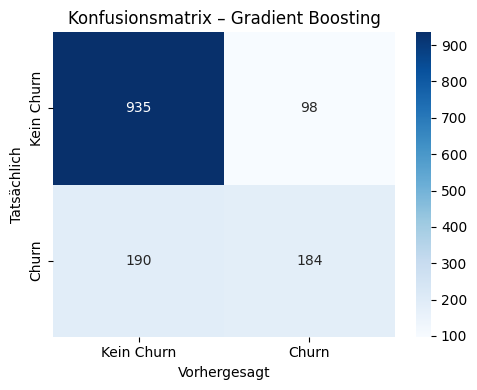

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Kein Churn", "Churn"], yticklabels=["Kein Churn", "Churn"])
plt.title("Konfusionsmatrix – Gradient Boosting")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.tight_layout()
plt.show()

# 12. Wichtigste Merkmale anzeigen

In [15]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Wichtigkeit": gb_model.feature_importances_
}).sort_values(by="Wichtigkeit", ascending=False)

print("\n📈 Wichtigste Merkmale laut Modell:")
print(feature_importances.head(10))


📈 Wichtigste Merkmale laut Modell:
             Feature  Wichtigkeit
14          Contract     0.403979
4             tenure     0.152937
17    MonthlyCharges     0.133296
8     OnlineSecurity     0.082943
18      TotalCharges     0.075007
11       TechSupport     0.060621
7    InternetService     0.023629
16     PaymentMethod     0.015705
15  PaperlessBilling     0.012496
1      SeniorCitizen     0.010658
